In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint

%matplotlib ipympl

In [2]:
mu = 1.0   # parameter value
def dx_dt(x, t):
    return [x[1], mu*(1-x[0]**2)*x[1] - x[0]]

y_limit = 2.172712508611704
ts = np.linspace(0.0, 6.67, 10000)
x_limit = odeint(dx_dt, [0.0, y_limit], ts)



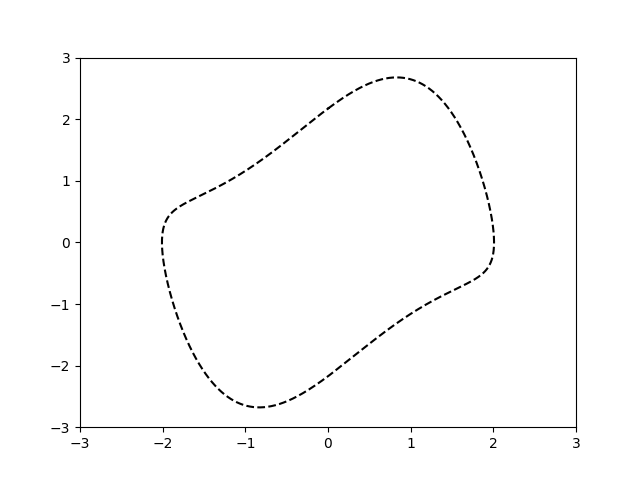

In [3]:
mu = 1.0   # parameter value
def dx_dt(x, t):
    return [x[1], mu*(1-x[0]**2)*x[1] - x[0]]

def random_ic(scalefac=2.0):  # generate initial condition
    return scalefac*(2.0*np.random.rand(2) - 1.0)

ts = np.linspace(0.0, 40.0, 400)
nlines = 20
linedata = []
for ic in [random_ic() for i in range(nlines)]:
    linedata.append( odeint(dx_dt, ic, ts) )

fig = plt.figure()
ax = plt.axes(xlim=(-3,3), ylim=(-3, 3))
ax.plot(x_limit[:,0], x_limit[:,1], 'k--')
line, = ax.plot([], [], 'ro')
npts = len(linedata[0][:,0])

def init(): 
    line.set_data([],[])
    return line,

def animate(i): 
    line.set_data([l[i,0] for l in linedata], [l[i,1] for l in linedata])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
       frames=npts, interval=50, blit=True)



In [45]:
ts = np.linspace(0.0, 40.0, 10000)
# y0 = 2.172686477445664
xs = odeint(dx_dt,[0,y0], ts)

In [46]:
for i in range(len(xs) - 1):
    if xs[i,0] < 0 and xs[i+1,0] > 0:
        y0 = (xs[i+1,0] * xs[i,1] - xs[i,0] * xs[i+1,1]) / (xs[i+1,0] - xs[i,0])
        print((i,ts[i],y0))
print(y0)

(1665, 6.660666066606661, 2.1727097164923177)
(3331, 13.325332533253325, 2.172709879589841)
(4996, 19.985998599859986, 2.172713041878025)
(6662, 26.65066506650665, 2.1727095339548885)
(8328, 33.31533153315331, 2.1727101257852937)
(9993, 39.97599759975998, 2.172712508611704)
2.172712508611704
